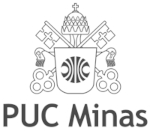

## Programa de Pós Graduação em Informática

### Disciplina: Natural Language Processing (NLP)
### Aluno: Felipe A. L. Reis

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random
import string
import re

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import nltk  
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /home/falreis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/falreis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/falreis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/falreis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/falreis/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/falreis/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Algumas estratégias para processamento de linguagem natural como a remoção de stopwords não funcionaram adequadamente, diminuindo o desempenho dos algoritmos.
Com isso, alguns códigos foram suprimidos ou comentados.

In [3]:
#funções úteis
def print_metrics(predictor):
    print('F1 Score:', metrics.f1_score(news_test.target, predictor, average='macro'))
    print('Accuracy:', metrics.accuracy_score(news_test.target, predictor))

def remove_pontuacao(msg):
    #stops = set(stopwords.words('english'))

    #remove linha "From..." e "Lines..."
    msg = re.sub(r'From.*\n?', '', msg)
    msg = re.sub(r'Lines.*\n?', '', msg)

    #remove palavra "Subject:"
    msg = msg.replace("Subject:", "").replace("subject:", "").replace("Re:", "").replace("re:", "")

    #remove pontuação
    #msg = msg.translate(str.maketrans('', '', string.punctuation))
    msg = msg.replace('\n',' ').replace('\t', ' ').replace('\r', ' ')

    #remove múltiplos espaços em branco
    msg = re.sub(' +', ' ', msg)

    #remove stopwords
    #msg = re.sub('| '.join(stops), '', msg)

    return msg

def preProcessCorpus(corpus):
    newCorpus = [doc.lower() for doc in corpus]
    regex = r"(?<!\d)[.,;:-](?!\d)"
    newCorpus = [re.sub(regex, "", doc, 0) for doc in newCorpus]
    return newCorpus

In [4]:
#filtro de classe para somente esportes, de modo a simplificar os resultados e acelerar o treinamento.
categories = [
  'alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'
]

In [5]:
#obtém o conjunto de dados para as categorias selecionadas
news_train = fetch_20newsgroups(subset='train', categories = categories)
print(len(news_train.filenames))

11314


In [6]:
#verifica um exemplo de mensagem
print(news_train['data'][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [7]:
#imprime a classe do exemplo
news_train['target_names'][news_train['target'][0]]

'rec.autos'

In [8]:
#remove pontuacao
news_train.data = [remove_pontuacao(news) for news in news_train.data]
print(news_train.data[0])

 WHAT car is this!? Nntp-Posting-Host: rac3.wam.umd.edu Organization: University of Maryland, College Park I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail. Thanks, - IL ---- brought to you by your neighborhood Lerxst ---- 


In [9]:
#abre os dados com auxílio do pandas, para melhor visualização das informações
#df = pd.DataFrame(data = np.c_[news_train['data'], news_train['target']], columns = ['mail', 'target'])
#df.head()

In [10]:
#df.describe()

In [11]:
#pre-processa os dados e aplica o TF-IDF
corpus_train = preProcessCorpus(news_train.data)

#converte os resultados para TF-IDF
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus_train)
vectors.shape

(11314, 144393)

In [12]:
#obtém o conjunto de testes para processamento das predições
news_test = fetch_20newsgroups(subset='test', categories=categories)

#remove pontuacao
news_test.data = [remove_pontuacao(news) for news in news_test.data]

#pre-processa os dados e aplica o TF-IDF
corpus_test = preProcessCorpus(news_test.data)

#transforma em um vetor
vectors_test = vectorizer.transform(corpus_test)

### Classificador Bayesiano (Multinomial)

In [13]:
#aprende o conjunto de dados usando classificador bayesiano
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, news_train.target)
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

#realiza predições sobre o conjunto de testes e apura métricas
bayes_pred = clf.predict(vectors_test)

#imprime predições
print_metrics(bayes_pred)

F1 Score: 0.8334156137716352
Accuracy: 0.8412108337758896


### Classificador SVM Linear

In [20]:
#treina o SVM, utilizando os vetores gerados pelo TF-IDF
svm = SVC(kernel= 'linear', random_state=1)
svm.fit(vectors, news_train.target)
 
#realiza predições sobre o conjunto de testes e apura métricas
svm_pred = svm.predict(vectors_test)

#imprime predições
print_metrics(svm_pred)

F1 Score: 0.8277477927319751
Accuracy: 0.8344397238449283


### Classificador SVM Polinomial

In [19]:
#treina o SVM, utilizando os vetores gerados pelo TF-IDF
svm = SVC(kernel= 'poly', random_state=1)
svm.fit(vectors, news_train.target)
 
#realiza predições sobre o conjunto de testes e apura métricas
svm_pred = svm.predict(vectors_test)

#imprime predições
print_metrics(svm_pred)

F1 Score: 0.625723918177572
Accuracy: 0.5638608603292619


### Classificador Regressão Logística

In [15]:
#treina o algoritmo de Regressão Logística, utilizando os vetores gerados pelo TF-IDF
logistic = LogisticRegression(random_state=0, max_iter=200)
logistic.fit(vectors, news_train.target)

#realiza predições sobre o conjunto de testes e apura métricas
log_pred = logistic.predict(vectors_test)

#imprime predições
print_metrics(log_pred)

F1 Score: 0.8168030709591004
Accuracy: 0.825942644715879


### Classificador Multilayer Perceptron

In [16]:
#treina o algoritmo de Regressão Logística, utilizando os vetores gerados pelo TF-IDF
mlp = MLPClassifier(random_state=1, max_iter=100) #limitada a 100 épocas, devido ao tempo de processamento
mlp.fit(vectors, news_train.target)

#realiza predições sobre o conjunto de testes e apura métricas
mlp_pred = mlp.predict(vectors_test)

#imprime predições
print_metrics(mlp_pred)

F1 Score: 0.850910561290181
Accuracy: 0.8575411577270313
